In [519]:
 #!pip install pandas-profiling==2.7.1

#Importing libraries

In [520]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install --upgrade pandas
import pandas_profiling
import scipy.stats as stats
import statsmodels as sm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import statsmodels.formula.api as smf   
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [521]:
import seaborn as sns
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, accuracy_score,auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from pandas import get_dummies
from scipy import stats
import xgboost as xgb
import matplotlib
import sklearn

#Reading the Data with Basic Understanding of Data

In [522]:
df = pd.read_csv('TRAIN.csv')
df_test = pd.read_csv('TEST.csv')
df.head()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,31715,current,M,41,723,30292.00,NaN,2679.49,NaN,17032.745,NaN,3.0,2.0,3.0,NaN,NaN,NaN,200000.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,60454.78,58341.0,10.0,4.0,54240.0,74507.12,80827.0,6.0,8.0,73729.0,60073.14,58057.0,4.0,10.0,53560.0,NaN,3083.69,12163
1,23099,current,M,41,523,9552.05,1867.67,3806.00,473.43,2234.000,793.0,2.0,5.0,3.0,2.0,2.0,5.0,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32652.47,33714.0,19.0,2.0,20000.0,17774.43,19674.0,2.0,8.0,11600.0,8739.36,7716.0,2.0,12.0,7600.0,NaN,3953.04,680
2,20982,current,M,36,864,6204.21,NaN,830.60,NaN,1353.750,NaN,14.0,5.0,2.0,NaN,NaN,NaN,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,200
3,455,current,M,38,349,40877.62,NaN,19729.60,NaN,30446.610,NaN,12.0,8.0,10.0,NaN,NaN,NaN,50000.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3203.25,25067.0,3.0,1.0,24795.0,24059.24,25003.0,1.0,2.0,24859.0,54018.52,55597.0,3.0,4.0,30000.0,NaN,4059.07,1676
4,20382,current,M,48,523,10046.00,NaN,6046.00,NaN,1151.400,NaN,2.0,4.0,21.0,NaN,NaN,NaN,300000.0,NaN,NaN,NaN,1.0,1497586.08,NaN,50000.0,NaN,74823.50,41012.4,16.0,4.0,40000.0,91188.62,90567.5,7.0,15.0,50000.0,71310.50,130482.0,8.0,16.0,55000.0,NaN,5804.29,1603


In [523]:
print(df.shape)
print('\n')
print(df_test.shape)

(24615, 44)


(8205, 43)


In [524]:
df.describe()

,id,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
count,24615.000000,24615.000000,24615.000000,24615.000000,10276.000000,2.461500e+04,11595.000000,24615.000000,8678.000000,22847.000000,23756.000000,23437.000000,10276.000000,11595.000000,12955.000000,24609.000000,1992.0,633.0,2154.0,1221.0,1.040000e+03,1.724000e+03,9.960000e+02,302.000000,2.318900e+04,2.209500e+04,23279.000000,23279.000000,2.209500e+04,2.286200e+04,2.204800e+04,23041.000000,23041.000000,2.204800e+04,2.292000e+04,2.342900e+04,23443.000000,23443.000000,2.342900e+04,2.461500e+04,24615.000000
mean,16352.306602,35.910867,554.286289,16724.699679,5837.704149,1.449078e+04,5778.853761,9034.903220,4580.288176,9.195649,9.605910,12.328071,5.290483,6.260716,7.906523,121636.324150,1.0,1.0,1.0,1.0,8.689592e+05,1.782198e+05,4.161000e+04,5029.033214,7.088840e+04,7.637680e+04,14.893466,3.796555,4.687195e+04,6.777295e+04,7.998758e+04,4.093703,13.939716,4.980322e+04,7.775094e+04,7.605872e+04,5.789404,16.023546,4.509387e+04,1.051152e+04,6833.298639
std,9422.382515,8.350756,188.502571,25557.121858,12149.234942,2.428710e+04,15169.627917,15579.128037,9440.029274,11.449178,9.884521,11.908281,6.137896,7.317564,9.108924,123600.524542,0.0,0.0,0.0,0.0,4.829767e+06,4.699193e+05,9.336509e+04,6251.799722,1.798309e+05,1.948909e+05,11.598500,3.514741,1.305665e+05,2.030006e+05,2.096595e+05,3.885775,11.501255,1.252070e+05,3.080153e+05,2.981304e+05,4.749826,13.415936,1.274878e+05,3.009496e+05,12689.409718
min,0.000000,22.000000,123.000000,233.970000,10.010000,1.030000e+02,20.000000,51.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,2.000000e-02,3.590000e+00,0.000000e+00,-12179.000000,4.010000e+00,3.432000e+01,0.000000,0.000000,1.800000e-01,1.500000e-01,1.061000e+01,0.000000,0.000000,1.500000e-01,5.230000e+00,1.300000e+01,0.000000,0.000000,6.000000e-02,0.000000e+00,0.000000
25%,8182.500000,31.000000,425.000000,3707.050000,844.487500,2.981930e+03,797.000000,1626.000000,740.000000,3.000000,3.000000,4.000000,1.000000,2.000000,2.000000,45000.000000,1.0,1.0,1.0,1.0,5.031000e+03,3.500000e+04,7.444000e+03,977.000000,2.231772e+04,2.533200e+04,6.000000,2.000000,1.800000e+04,2.005925e+04,2.453975e+04,2.000000,6.000000,1.809474e+04,2.518399e+04,2.310900e+04,3.000000,6.000000,1.600000e+04,0.000000e+00,1275.500000
50%,16339.000000,34.000000,575.000000,8911.300000,2294.320000,7.338500e+03,2132.000000,4153.000000,1823.000000,7.000000,7.000000,9.000000,3.000000,4.000000,5.000000,75000.000000,1.0,1.0,1.0,1.0,3.218960e+04,8.500000e+04,2.500000e+04,5439.000000,4.113080e+04,4.399700e+04,12.000000,3.000000,2.804900e+04,3.821506e+04,4.527949e+04,3.000000,11.000000,3.000000e+04,4.616739e+04,4.313000e+04,5.000000,13.000000,2.685405e+04,1.676600e+02,3118.000000
75%,24435.500000,39.000000,683.000000,19896.860000,6163.252500,1.694145e+04,5651.095000,10224.570000,4558.000000,12.000000,13.000000,17.000000,7.000000,8.000000,10.000000,145000.000000,1.0,1.0,1.0,1.0,1.716245e+05,1.774847e+05,5.000000e+04,6885.000000,7.513563e+04,7.945350e+04,20.000000,5.000000,4.800000e+04,7.382796e+04,8.933325e+04,5.000000,19.000000,5.000000e+04,8.424984e+04,8.061868e+04,7.000000,22.000000,4.680320e+04,4.187245e+03,7310.000000
max,32820.000000,224.000000,977.000000,804712.580000,366223.160000,1.117246e+06,911223.490000,382914.100000,167311.000000,1012.000000,601.000000,653.000000,82.000000,97.000000,104.000000,1000000.000000,1.0,1.0,1.0,1.0,8.445222e+07,1.36

In [525]:
df_test.describe()

,id,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
count,8205.000000,8205.000000,8205.000000,8205.000000,3492.000000,8205.000000,3886.000000,8205.000000,2845.000000,7574.000000,7911.000000,7793.000000,3492.000000,3886.000000,4368.000000,8202.000000,750.0,213.0,729.0,404.0,3.860000e+02,6.140000e+02,336.000000,104.00000,7.741000e+03,7.423000e+03,7783.000000,7783.000000,7.423000e+03,7.657000e+03,7.367000e+03,7708.000000,7708.000000,7.367000e+03,7.705000e+03,7.848000e+03,7849.000000,7849.000000,7.848000e+03,8.205000e+03
mean,16040.688239,36.074101,556.558440,16473.529718,5403.656071,14175.272239,5207.790278,9020.009896,4930.333199,9.061262,9.342814,12.210317,5.158076,6.288214,7.868819,121305.995977,1.0,1.0,1.0,1.0,6.567312e+05,1.718460e+05,34267.601190,4808.89125,6.745752e+04,7.253982e+04,14.868817,3.777464,4.527809e+04,6.507549e+04,7.841397e+04,4.068371,13.920083,4.937863e+04,7.713799e+04,7.516837e+04,5.703019,15.935406,4.369772e+04,6.735919e+03
std,9476.665735,9.045681,187.372124,23838.809556,9537.302578,21568.584145,9991.982882,16139.501509,12446.998457,8.500779,8.899412,11.110597,6.173579,7.564280,9.456998,121267.959795,0.0,0.0,0.0,0.0,3.047389e+06,3.440867e+05,48051.263125,5692.24630,1.041087e+05,1.119441e+05,11.563870,3.383456,6.897966e+04,1.189798e+05,1.802272e+05,3.732021,11.317050,1.387322e+05,3.312229e+05,3.294279e+05,4.567016,13.233265,1.017258e+05,4.661226e+04
min,7.000000,22.000000,123.000000,253.000000,19.000000,141.000000,24.000000,109.000000,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.0,1.0,1.0,1.0,3.500000e-01,3.000000e+00,448.000000,-6885.00000,9.000000e+00,7.100000e+01,0.000000,0.000000,3.600000e-01,2.075000e+01,3.297000e+01,0.000000,0.000000,9.700000e-01,3.100000e+01,1.188000e+01,0.000000,0.000000,8.000000e-02,0.000000e+00
25%,7823.000000,31.000000,435.000000,3728.000000,860.250000,2987.760000,794.980000,1674.460000,751.000000,3.000000,3.000000,4.000000,1.000000,1.000000,2.000000,45000.000000,1.0,1.0,1.0,1.0,4.484062e+03,3.500000e+04,5514.000000,977.00000,2.221700e+04,2.525050e+04,6.000000,2.000000,1.800000e+04,2.028517e+04,2.508400e+04,2.000000,6.000000,1.838178e+04,2.483995e+04,2.289725e+04,3.000000,7.000000,1.600000e+04,0.000000e+00
50%,15896.000000,34.000000,575.000000,8913.120000,2250.000000,7304.010000,2114.065000,4118.000000,1858.000000,7.000000,7.000000,9.000000,3.000000,4.000000,4.000000,75000.000000,1.0,1.0,1.0,1.0,3.527096e+04,8.731150e+04,25000.000000,5282.50000,4.116549e+04,4.374500e+04,12.000000,3.000000,2.836000e+04,3.883601e+04,4.574800e+04,3.000000,11.000000,3.000000e+04,4.533675e+04,4.228899e+04,5.000000,13.000000,2.691400e+04,8.792000e+01
75%,24136.000000,39.000000,683.000000,20057.180000,5815.750000,16590.580000,5595.450000,9859.000000,4777.000000,12.000000,13.000000,17.000000,6.000000,8.000000,10.000000,148750.000000,1.0,1.0,1.0,1.0,1.800410e+05,1.708091e+05,50000.000000,6885.00000,7.639975e+04,8.050750e+04,20.000000,5.000000,4.782600e+04,7.358387e+04,8.888051e+04,5.000000,19.000000,5.000000e+04,8.376800e+04,8.116750e+04,7.000000,22.000000,4.800000e+04,4.143930e+03
max,32819.000000,223.000000,977.000000,456645.330000,152099.000000,441339.520000,161864.220000,302751.410000,301991.940000,136.000000,128.000000,121.000000,77.000000,68.000000,98.000000,1000000.000000,1.0,1.0,1.0,1.0,3.586043e+07,4.000000e+06,500000.000000,26601.00000,2.831121e+06,3.565671e+06,103.000000,54.000000,1.500000e+06,4.290603e+06,1.060175e+07,50.000000,88.0

In [526]:
df.describe(include=object)

,account_type,gender,loan_enq
count,24615,24615,437
unique,2,2,1
top,current,M,Y
freq,19362,21093,437


In [527]:
df_test.describe(include=object)

,account_type,gender,loan_enq
count,8205,8205,172
unique,2,2,1
top,current,M,Y
freq,6463,7013,172


In [528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24615 entries, 0 to 24614
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     24615 non-null  int64  
 1   account_type           24615 non-null  object 
 2   gender                 24615 non-null  object 
 3   age                    24615 non-null  int64  
 4   region_code            24615 non-null  int64  
 5   cc_cons_apr            24615 non-null  float64
 6   dc_cons_apr            10276 non-null  float64
 7   cc_cons_may            24615 non-null  float64
 8   dc_cons_may            11595 non-null  float64
 9   cc_cons_jun            24615 non-null  float64
 10  dc_cons_jun            8678 non-null   float64
 11  cc_count_apr           22847 non-null  float64
 12  cc_count_may           23756 non-null  float64
 13  cc_count_jun           23437 non-null  float64
 14  dc_count_apr           10276 non-null  float64
 15  dc

In [529]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8205 entries, 0 to 8204
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     8205 non-null   int64  
 1   account_type           8205 non-null   object 
 2   gender                 8205 non-null   object 
 3   age                    8205 non-null   int64  
 4   region_code            8205 non-null   int64  
 5   cc_cons_apr            8205 non-null   float64
 6   dc_cons_apr            3492 non-null   float64
 7   cc_cons_may            8205 non-null   float64
 8   dc_cons_may            3886 non-null   float64
 9   cc_cons_jun            8205 non-null   float64
 10  dc_cons_jun            2845 non-null   float64
 11  cc_count_apr           7574 non-null   float64
 12  cc_count_may           7911 non-null   float64
 13  cc_count_jun           7793 non-null   float64
 14  dc_count_apr           3492 non-null   float64
 15  dc_c

In [530]:
#checking for null values
print(df.isnull().sum())

id                           0
account_type                 0
gender                       0
age                          0
region_code                  0
cc_cons_apr                  0
dc_cons_apr              14339
cc_cons_may                  0
dc_cons_may              13020
cc_cons_jun                  0
dc_cons_jun              15937
cc_count_apr              1768
cc_count_may               859
cc_count_jun              1178
dc_count_apr             14339
dc_count_may             13020
dc_count_jun             11660
card_lim                     6
personal_loan_active     22623
vehicle_loan_active      23982
personal_loan_closed     22461
vehicle_loan_closed      23394
investment_1             23575
investment_2             22891
investment_3             23619
investment_4             24313
debit_amount_apr          1426
credit_amount_apr         2520
debit_count_apr           1336
credit_count_apr          1336
max_credit_amount_apr     2520
debit_amount_may          1753
credit_a

In [531]:
#checking for null values
print(df_test.isnull().sum())

id                          0
account_type                0
gender                      0
age                         0
region_code                 0
cc_cons_apr                 0
dc_cons_apr              4713
cc_cons_may                 0
dc_cons_may              4319
cc_cons_jun                 0
dc_cons_jun              5360
cc_count_apr              631
cc_count_may              294
cc_count_jun              412
dc_count_apr             4713
dc_count_may             4319
dc_count_jun             3837
card_lim                    3
personal_loan_active     7455
vehicle_loan_active      7992
personal_loan_closed     7476
vehicle_loan_closed      7801
investment_1             7819
investment_2             7591
investment_3             7869
investment_4             8101
debit_amount_apr          464
credit_amount_apr         782
debit_count_apr           422
credit_count_apr          422
max_credit_amount_apr     782
debit_amount_may          548
credit_amount_may         838
credit_cou

In [532]:
#Checking datatypes
df.dtypes

id                         int64
account_type              object
gender                    object
age                        int64
region_code                int64
cc_cons_apr              float64
dc_cons_apr              float64
cc_cons_may              float64
dc_cons_may              float64
cc_cons_jun              float64
dc_cons_jun              float64
cc_count_apr             float64
cc_count_may             float64
cc_count_jun             float64
dc_count_apr             float64
dc_count_may             float64
dc_count_jun             float64
card_lim                 float64
personal_loan_active     float64
vehicle_loan_active      float64
personal_loan_closed     float64
vehicle_loan_closed      float64
investment_1             float64
investment_2             float64
investment_3             float64
investment_4             float64
debit_amount_apr         float64
credit_amount_apr        float64
debit_count_apr          float64
credit_count_apr         float64
max_credit

In [533]:
df.cc_cons.value_counts()
len(df.cc_cons.value_counts())

11221

In [534]:
#Checking for duplicate values
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: {}".format(duplicate_rows_df.shape))

number of duplicate rows: (0, 44)


#EDA


In [ ]:
#from pandas_profiling import ProfileReport
#report = pandas_profiling.ProfileReport(df)
#report

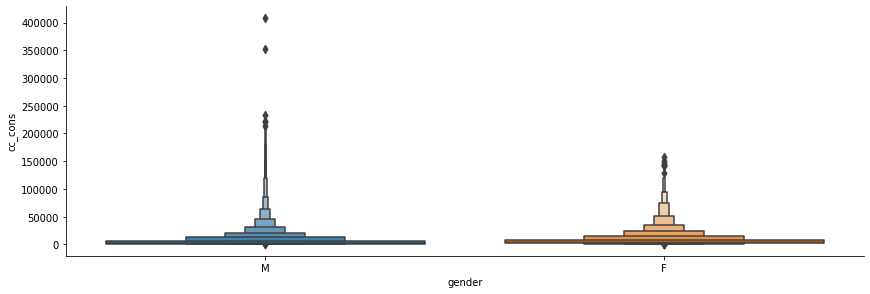

In [535]:
# Gender vs  Average Credit Card Spend

sns.catplot(y = "cc_cons", x = "gender", data = df.sort_values("cc_cons", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

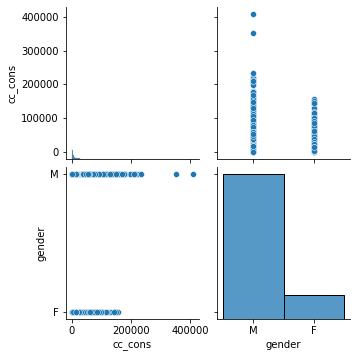

In [536]:
sns.pairplot(data=df,vars=["cc_cons","gender"])

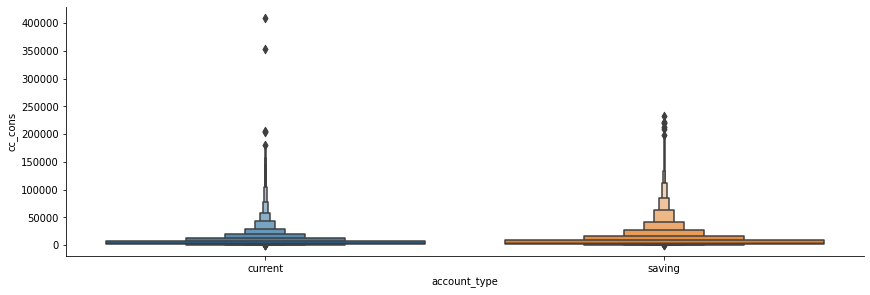

In [537]:
# Account Type  vs  Average Credit Card Spend

sns.catplot(y = "cc_cons", x = "account_type", data = df.sort_values("cc_cons", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

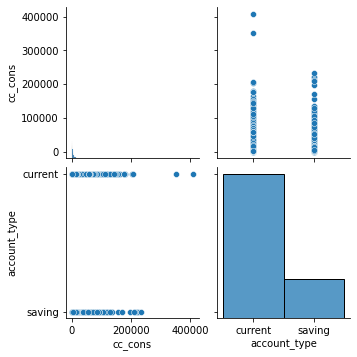

In [538]:
sns.pairplot(data=df,vars=["cc_cons","account_type"])

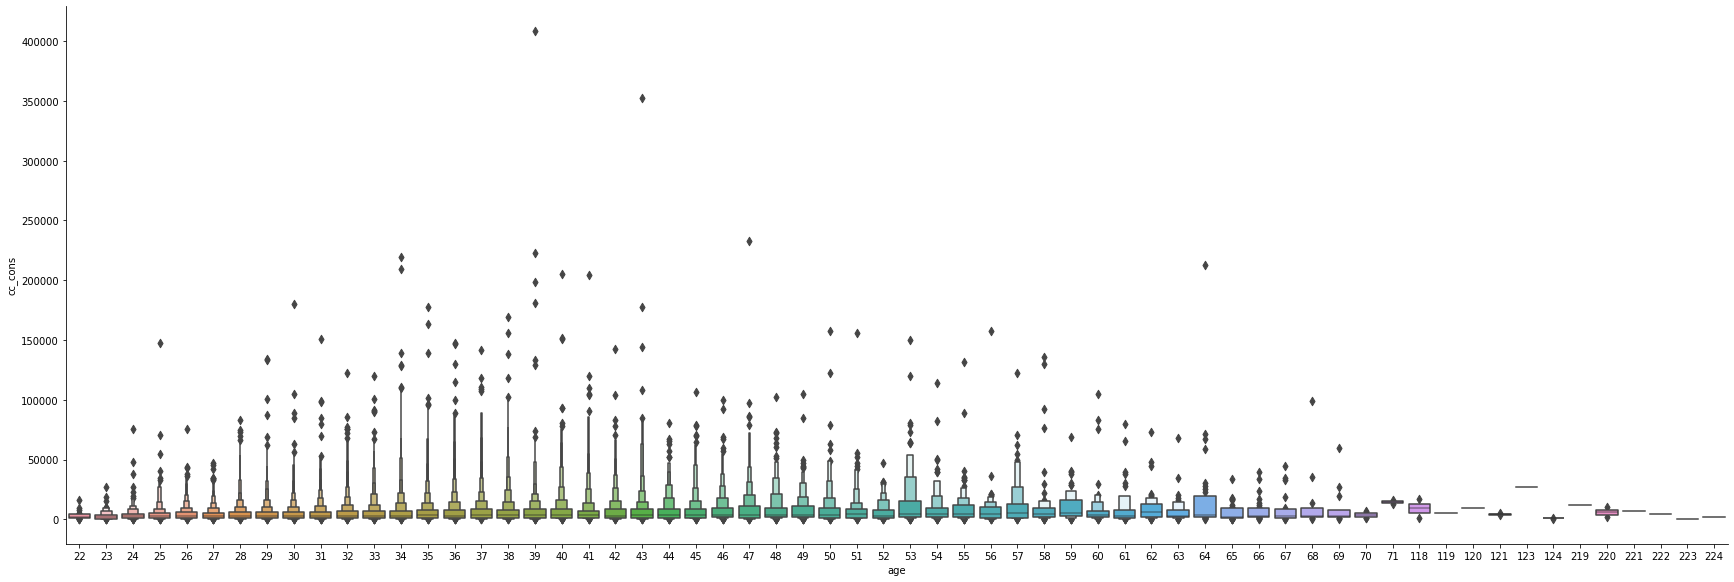

In [539]:
# Age of customer  vs  Average Credit Card Spend

sns.catplot(y = "cc_cons", x = "age", data = df.sort_values("cc_cons", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

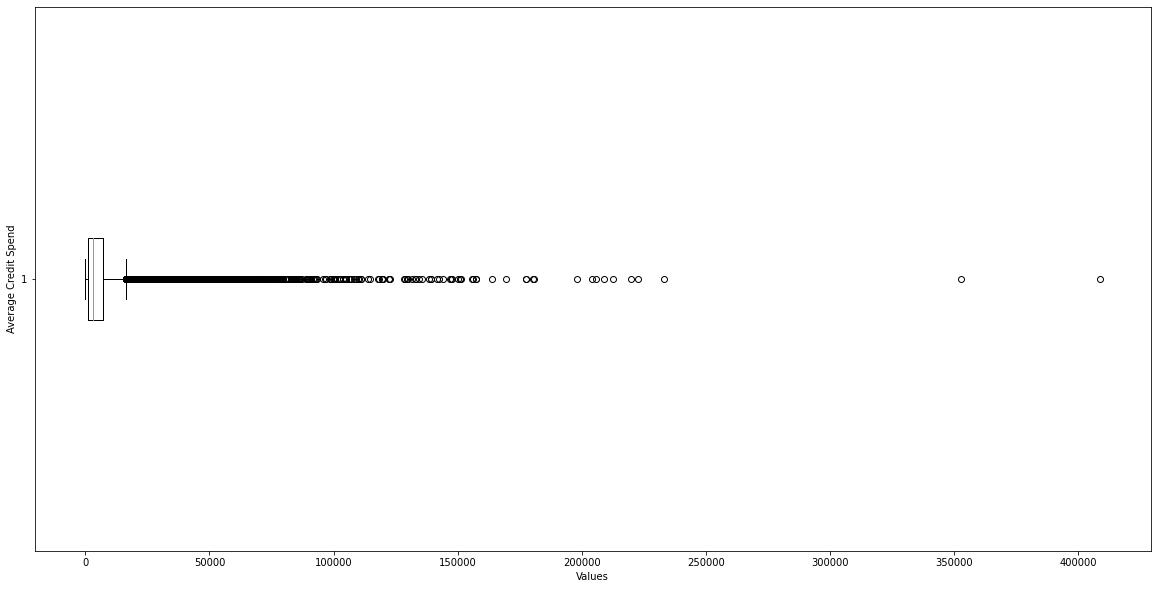

In [540]:
#Outliers
#boxplot
plt.figure(figsize = (20,10))
plt.boxplot(df['cc_cons'], vert = False)
plt.ylabel('Average Credit Spend')
plt.xlabel('Values')
plt.show()

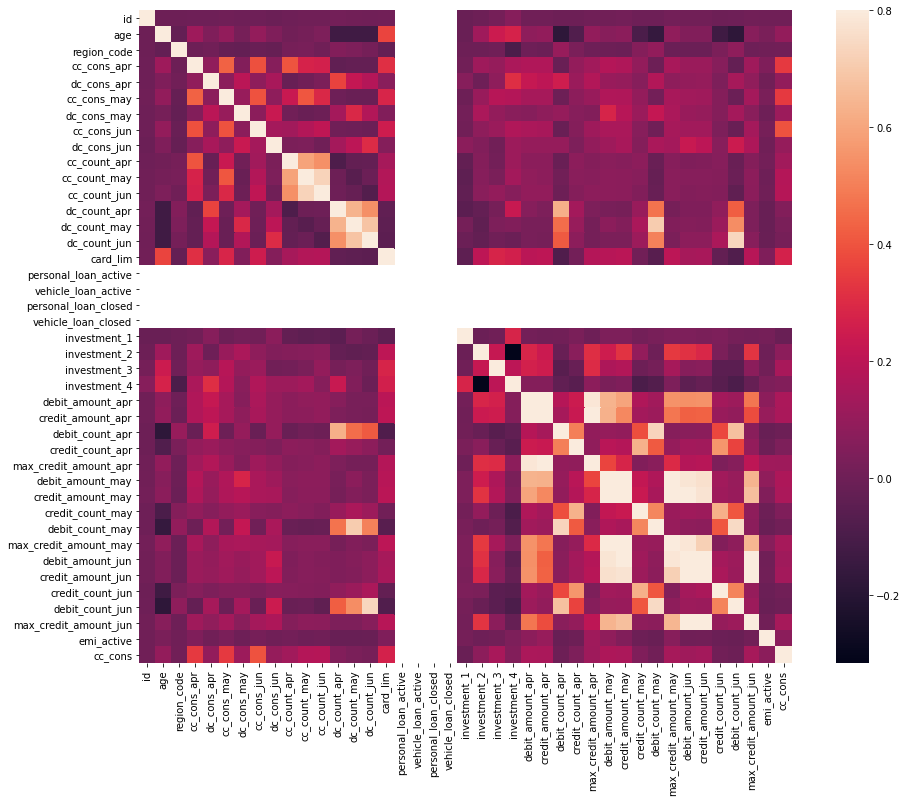

In [541]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

In [542]:
#from pandas_profiling import ProfileReport
#report = pandas_profiling.ProfileReport(df)
#report

#Feature Selection


In [543]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [544]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [545]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

In [546]:
conti_vars=df.select_dtypes(['float64','int64'])
cat_vars=df.select_dtypes('object')

In [547]:
conti_vars['vehicle_loan_active'].fillna(value=0, inplace= True)
conti_vars['vehicle_loan_closed'].fillna(value=0, inplace= True)
conti_vars['personal_loan_active'].fillna(value=0, inplace= True)
conti_vars['personal_loan_closed'].fillna(value=0, inplace= True)
conti_vars['investment_1'].fillna(value=0, inplace= True)
conti_vars['investment_2'].fillna(value=0, inplace= True)
conti_vars['investment_3'].fillna(value=0, inplace= True)
conti_vars['investment_4'].fillna(value=0, inplace= True)

In [548]:
conti_vars.apply(continuous_var_summary).T.round(1).sort_values('NMISS',ascending=False).head(10)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
dc_cons_jun,8678.0,15937.0,3.974774e+07,4580.3,1823.0,9440.0,8.911415e+07,23.0,157.9,290.0,398.0,740.0,1823.0,4558.0,10279.7,16946.2,45028.2,167311.0
dc_cons_apr,10276.0,14339.0,5.998825e+07,5837.7,2294.3,12149.2,1.476039e+08,10.0,137.8,286.0,411.8,844.5,2294.3,6163.3,13902.1,21365.8,50679.5,366223.2
dc_count_apr,10276.0,14339.0,5.436500e+04,5.3,3.0,6.1,3.770000e+01,1.0,1.0,1.0,1.0,1.0,3.0,7.0,13.0,17.0,30.0,82.0
dc_count_may,11595.0,13020.0,7.259300e+04,6.3,4.0,7.3,5.350000e+01,1.0,1.0,1.0,1.0,2.0,4.0,8.0,15.0,20.0,36.0,97.0
dc_cons_may,11595.0,13020.0,6.700581e+07,5778.9,2132.0,15169.6,2.301176e+08,20.0,148.0,283.0,398.0,797.0,2132.0,5651.1,12795.7,21201.1,57944.0,911223.5
dc_count_jun,12955.0,11660.0,1.024290e+05,7.9,5.0,9.1,8.300000e+01,1.0,1.0,1.0,1.0,2.0,5.0,10.0,19.0,26.0,43.0,104.0
credit_amount_may,22048.0,2567.0,1.763566e+09,79987.6,45279.5,209659.5,4.395710e+10,10.6,349.4,5610.7,12012.5,24539.8,45279.5,89333.2,168862.7,242285.7,523806.8,22463497.9
max_credit_amount_may,22048.0,2567.0,1.098062e+09,49803.2,30000.0,125207.0,1.567679e+10,0.2,125.6,4482.8,9999.7,18094.7,30000.0,50000.0,100000.0,150000.0,300000.0,12851029.8
credit_amount_apr,22095.0,2520.0,1.687545e+09,76376.8,43997.0,194890.9,3.798248e+10,34.3,693.8,8154.4,14436.2,25332.0,43997.0,79453.5,147864.2,223989.9,540181.5,13100583.0
max_credit_amount_apr,22095.0,2520.0,1.035636e+09,46871.9,28049.0,130566.5,1.704761e+10,0.2,500.0,6000.0,10100.0,18000.0,28049.0,48000.0,87983.6,126984.3,327078.4,12029154.0


In [549]:
cat_vars.apply(categorical_var_summary).T

,N,NMISS,MODE,FREQ,PERCENT
account_type,24615,0,current,19362,78.66
gender,24615,0,M,21093,85.69
loan_enq,437,24178,Y,437,100


In [550]:
cat_vars['loan_enq'].fillna('N',inplace= True)

In [551]:
#handling outliers
conti_vars = conti_vars.apply(lambda x: x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))

In [552]:
#Missing value imputations
conti_vars = conti_vars.apply(missing_imputation)

In [553]:
conti_vars.apply(continuous_var_summary).T.round(1)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
id,24615.0,0.0,4.025133e+08,16352.4,16339.0,9416.8,8.867633e+07,327.3,327.5,1647.7,3245.0,8182.5,16339.0,24435.5,29398.0,31073.6,32486.0,32486.0
age,24615.0,0.0,8.818080e+05,35.8,34.0,7.5,5.620000e+01,24.0,24.0,26.0,28.0,31.0,34.0,39.0,46.0,51.0,62.0,62.0
region_code,24615.0,0.0,1.363752e+07,554.0,575.0,187.8,3.525480e+04,233.0,233.0,233.0,245.0,425.0,575.0,683.0,760.0,823.0,924.0,924.0
cc_cons_apr,24615.0,0.0,3.948006e+08,16039.0,8911.3,19952.1,3.980857e+08,630.0,630.0,1111.4,1710.6,3707.0,8911.3,19896.9,38817.9,57021.4,113535.9,113548.9
dc_cons_apr,24615.0,0.0,1.339407e+08,5441.4,5441.4,5402.7,2.918864e+07,137.8,206.1,462.0,807.4,3361.5,5441.4,5441.4,6421.3,12095.3,33079.9,50679.5
cc_cons_may,24615.0,0.0,3.402230e+08,13821.8,7338.5,18029.0,3.250441e+08,443.1,443.2,842.0,1295.7,2981.9,7338.5,16941.4,33562.5,50318.5,104731.2,104757.5
dc_cons_may,24615.0,0.0,1.309110e+08,5318.3,5318.3,6172.0,3.809322e+07,148.0,205.0,412.0,692.0,2386.9,5318.3,5318.3,6679.1,12236.5,37263.8,57944.0
cc_cons_jun,24615.0,0.0,2.117646e+08,8603.1,4153.0,12040.2,1.449656e+08,274.8,274.8,494.0,734.0,1626.0,4153.0,10224.6,21259.1,32900.0,70483.9,70486.4
dc_cons_jun,24615.0,0.0,1.054059e+08,4282.2,4282.2,4150.9,1.722968e+07,157.9,229.1,483.7,844.4,3865.0,4282.2,4282.2,4282.2,7807.6,24541.4,45028.2
cc_count_apr,24615.0,0.0,2.221136e+05,9.0,7.0,7.8,6.050000e+01,1.0,1.0,1.0,2.0,3.0,7.0,12.0,19.0,25.0,40.0,41.0


In [554]:
cat_vars.apply(categorical_var_summary).T.round(1)

,N,NMISS,MODE,FREQ,PERCENT
account_type,24615,0,current,19362,78.66
gender,24615,0,M,21093,85.69
loan_enq,24615,0,N,24178,98.22


In [555]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [556]:
cat_vars = df[['account_type','gender','loan_enq']]
for c_feature in ['account_type','gender','loan_enq']:
    cat_vars[c_feature] = cat_vars[c_feature].astype('category')
    cat_vars = create_dummies(cat_vars, c_feature)

In [557]:
df = pd.concat([conti_vars, cat_vars], axis = 1)
df.head()

,id,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,account_type_saving,gender_M
0,31715.0,41,723,30292.00,5441.426299,2679.49,5318.344117,17032.745,4282.181419,3.0,2.0,3.0,5.198132,6.168348,7.7912,200000.0,0.0,0.0,1.0,0.0,0.000,0.0,0.0,0.0,60454.78000,58341.000000,10.000000,4.000000,54240.000000,74507.120000,80827.000000,6.000000,8.000000,73729.000000,60073.140000,58057.000000,4.000000,10.000000,53560.000000,3083.69,12163.0,0,1
1,23099.0,41,523,9552.05,1867.670000,3806.00,473.430000,2234.000,793.000000,2.0,5.0,3.0,2.000000,2.000000,5.0000,18000.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,32652.47000,33714.000000,19.000000,2.000000,20000.000000,17774.430000,19674.000000,2.000000,8.000000,11600.000000,8739.360000,7716.000000,2.000000,12.000000,7600.000000,3953.04,680.0,0,1
2,20982.0,36,864,6204.21,5441.426299,830.60,5318.344117,1353.750,4282.181419,14.0,5.0,2.0,5.198132,6.168348,7.7912,30000.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,65367.13532,70258.757645,14.779544,3.734611,42825.989406,62496.997423,74319.823152,4.026648,13.821622,46001.407598,70750.802778,69166.903782,5.698076,15.890641,40918.110865,0.00,200.0,0,1
3,455.0,38,349,40877.62,5441.426299,19729.60,5318.344117,30446.610,4282.181419,12.0,8.0,10.0,5.198132,6.168348,7.7912,50000.0,0.0,0.0,0.0,1.0,0.000,0.0,0.0,0.0,3203.25000,25067.000000,3.000000,1.000000,24795.000000,24059.240000,25003.000000,1.000000,2.000000,24859.000000,54018.520000,55597.000000,3.000000,4.000000,30000.000000,4059.07,1676.0,0,1
4,20382.0,48,523,10046.00,5441.426299,6046.00,5318.344117,1151.400,4282.181419,2.0,4.0,21.0,5.198132,6.168348,7.7912,300000.0,0.0,0.0,0.0,1.0,192079.109,0.0,50000.0,0.0,74823.50000,41012.400000,16.000000,4.000000,40000.000000,91188.620000,90567.500000,7.000000,15.000000,50000.000000,71310.500000,130482.000000,8.000000,16.000000,55000.000000,5804.29,1603.0,0,1


In [558]:
df.shape

(24615, 43)

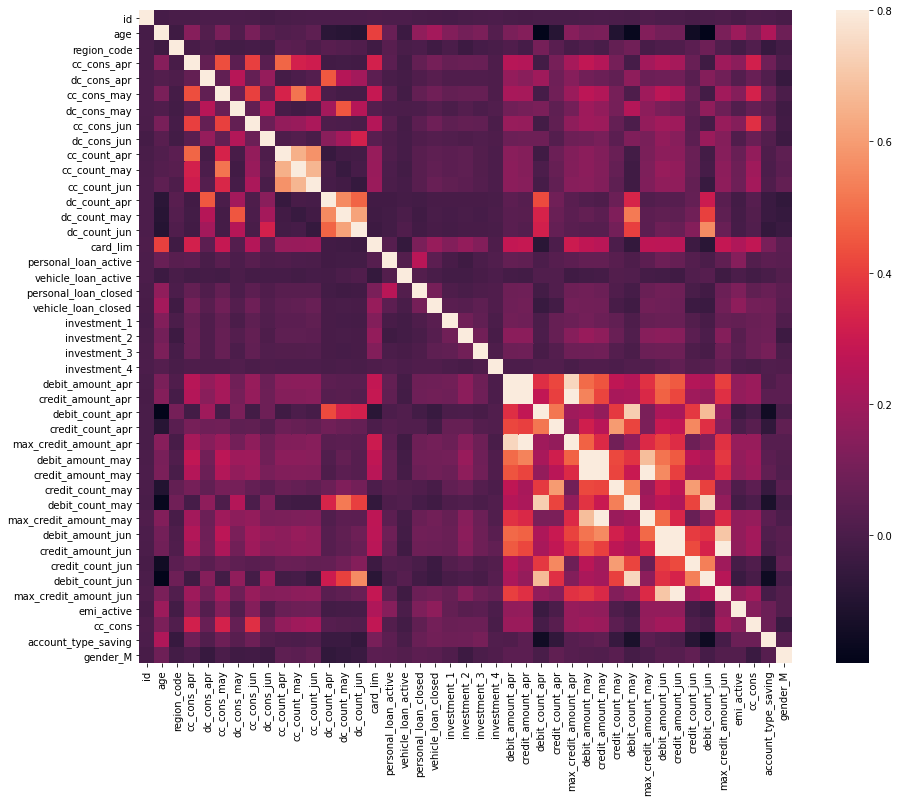

In [559]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

In [560]:
# correlation matrix
corrm = df.corr()
corrm

,id,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,account_type_saving,gender_M
id,1.000000,-0.009057,-0.002650,-0.001225,0.006381,0.004563,0.006298,0.002673,-0.012350,-0.000374,0.002629,0.004282,0.007200,0.007437,0.004098,0.008760,0.004490,0.007360,-0.003883,-0.004215,-0.008326,-0.000221,0.002993,0.004626,-0.003056,-0.006536,-0.002697,-0.003822,-0.000999,-0.000030,0.006137,0.000555,-0.000913,0.012212,0.003985,0.003209,-0.004687,0.001457,0.010854,-0.005968,0.008440,0.007214,-0.004401
age,-0.009057,1.000000,-0.029336,0.140583,0.020402,0.114303,0.013499,0.109517,0.032998,0.018526,0.024041,0.049879,-0.080245,-0.086453,-0.095101,0.403940,0.070350,-0.036422,0.164564,0.212044,0.134256,0.099619,0.120190,0.024670,0.116423,0.136598,-0.194156,-0.089400,0.147328,0.109550,0.115890,-0.101913,-0.171836,0.133536,0.099924,0.090514,-0.149745,-0.194240,0.115866,0.190722,0.118206,0.234848,0.084894
region_code,-0.002650,-0.029336,1.000000,-0.006595,0.011153,-0.013474,-0.018753,-0.010398,-0.016187,0.040453,0.031949,0.009480,0.033993,0.026861,0.015053,-0.026183,0.033415,-0.002824,0.006000,-0.023982,0.003319,-0.032863,-0.007975,-0.000389,0.014108,-0.011587,0.102622,0.035249,-0.003994,0.014591,-0.000828,0.061101,0.091168,-0.005439,0.008402,0.012680,0.039463,0.083030,0.017741,-0.017401,0.016117,-0.047580,-0.018968
cc_cons_apr,-0.001225,0.140583,-0.006595,1.000000,0.059835,0.433724,0.045283,0.402545,0.036082,0.479112,0.324456,0.309416,-0.019517,-0.017055,-0.021016,0.322829,0.039303,-0.018083,0.061562,0.103361,0.066240,0.074675,0.072218,0.008431,0.253245,0.245655,-0.019076,0.108150,0.213852,0.276362,0.246897,0.101798,-0.008129,0.207933,0.242332,0.216793,0.071400,-0.030431,0.194378,0.151594,0.321358,0.088137,0.007043
dc_cons_apr,0.006381,0.020402,0.011153,0.059835,1.000000,0.057747,0.255507,0.065736,0.176324,-0.013185,0.004330,0.023985,0.453366,0.249636,0.206120,0.046234,-0.001000,-0.015158,0.013072,0.033292,0.014027,0.013588,0.014926,0.011483,0.171734,0.150354,0.199352,0.086686,0.141793,0.094305,0.080333,0.056489,0.160782,0.081275,0.088503,0.090478,0.035150,0.137205,0.089276,0.025647,0.071941,0.017236,-0.049756
cc_cons_may,0.004563,0.114303,-0.013474,0.433724,0.057747,1.000000,0.075997,0.406415,0.060327,0.333040,0.509590,0.343065,0.000565,-0.014703,-0.012452,0.290512,0.031860,-0.016564,0.058866,0.091902,0.060512,0.068385,0.067888,0.008250,0.219796,0.217253,-0.010895,0.089910,0.188764,0.266121,0.240962,0.107303,0.008030,0.199968,0.265827,0.232240,0.074574,-0.015789,0.202711,0.136506,0.329715,0.082403,0.003519
dc_cons_may,0.006298,0.013499,-0.018753,0.045283,0.255507,0.075997,1.000000,0.060479,0.243679,-0.006477,-0.020783,-0.010675,0.206988,0.447740,0.249169,0.026386,0.006256,0.002505,0.007284,0.026486,0.000380,0.024298,0.006264,0.018406,0.089455,0.101184,0.115960,0.049618,0.098356,0.196869,0.170770,0.103696,0.246265,0.155822,0.113962,0.094028,0.049182,0.165835,0.085240,0.017812,0.065769,0.034202,-0.025111
cc_cons_jun,0.002673,0.109517,-0.010398,0.402545,0.065736,0.406415,0.060479,1.000000,0.080274,0.172093,0.186289,0.226524,0.008166,0.005915,-0.003334,0.245831,0.031994,-0.015157,0.042888,0.086462,0.049651,0.059746,0.056004,0.000339,0.180214,0.177486,-0.016207,0.050451,0.160202,0.199881,0.192302,0.062567,0.005771,0.172901,0.204695,0.195534,0.038426,-0.012428,0.178920,0.138919,0.365045,0.082128,-0.022071
dc_cons_jun,-0.012350,0.032998,-0.016187,0.036082,0.176324,0.060327,0.243679,0.080274,1.000000,0.009958,0.020186,

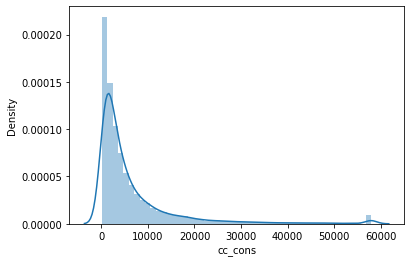

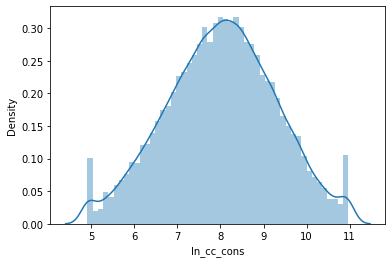

In [561]:
sns.distplot(df.cc_cons)
plt.show()
df['ln_cc_cons']=np.log(df['cc_cons']+1)
sns.distplot(df.ln_cc_cons)
plt.show()

In [563]:
df.drop('ln_cc_cons', axis = 1, inplace = True )

In [564]:
df['cc_cons']=np.log(df['cc_cons']+1)

#Train Test Split

In [565]:
X = df.drop(['cc_cons'],axis=1)
y = df['cc_cons']

In [566]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=10)

#Linear Regression

In [567]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [568]:
lr_pred=lr.predict(X_train)

In [569]:
lr_pred=(lr.predict(X_test))

In [570]:
print("RMLSE using Linear Regression :",mean_squared_log_error(y_test, lr_pred))

print("R2 using Linear Regression :",r2_score(y_test,lr_pred))

RMLSE using Logistic Regression : 0.017841824139398835
R2 using Logistic Regression : 0.20201147172908085


#Test Data Cleaning

In [571]:
conti_test=df_test.select_dtypes(['float64','int64'])
cat_test=df_test.select_dtypes('object')

In [572]:
#handling outliers
conti_test = conti_test.apply(lambda x: x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))

In [573]:
#Missing value imputations
conti_test = conti_test.apply(missing_imputation)

In [574]:
conti_test.apply(continuous_var_summary).T.round(1)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
id,8205.0,0.0,1.316158e+08,16040.9,15896.0,9470.2,8.968556e+07,404.0,404.0,1559.2,3020.6,7823.0,15896.0,24136.0,29365.8,30996.4,32506.5,32506.7
age,8205.0,0.0,2.947950e+05,35.9,34.0,7.5,5.650000e+01,24.0,24.0,27.0,28.0,31.0,34.0,39.0,46.0,51.0,62.0,62.0
region_code,8205.0,0.0,4.564502e+06,556.3,575.0,186.7,3.487410e+04,233.0,233.0,233.0,245.0,435.0,575.0,683.0,762.0,823.0,923.0,923.0
cc_cons_apr,8205.0,0.0,1.304599e+08,15900.1,8913.1,19679.2,3.872702e+08,613.1,613.2,1093.4,1700.0,3728.0,8913.1,20057.2,37964.8,54889.5,112594.6,112607.6
dc_cons_apr,8205.0,0.0,4.249647e+07,5179.3,5179.3,5156.6,2.659007e+07,143.9,203.0,440.0,799.0,3056.0,5179.3,5179.3,6137.8,11706.0,30571.8,48505.4
cc_cons_may,8205.0,0.0,1.122976e+08,13686.5,7304.0,17851.8,3.186864e+08,465.0,465.1,850.6,1318.8,2987.8,7304.0,16590.6,33230.4,49095.9,106040.9,106086.6
dc_cons_may,8205.0,0.0,4.044941e+07,4929.8,4929.8,5321.5,2.831784e+07,143.7,195.1,405.0,679.2,2306.0,4929.8,4929.8,6609.5,11788.6,31999.8,48658.5
cc_cons_jun,8205.0,0.0,7.017970e+07,8553.3,4118.0,12344.5,1.523877e+08,273.0,273.1,498.4,724.4,1674.5,4118.0,9859.0,20593.2,32451.4,74794.2,74844.3
dc_cons_jun,8205.0,0.0,3.641597e+07,4438.3,4438.3,4234.5,1.793124e+07,163.4,248.0,501.0,854.6,4233.0,4438.3,4438.3,4438.3,7989.6,27524.1,44474.8
cc_count_apr,8205.0,0.0,7.345180e+04,9.0,7.0,7.6,5.770000e+01,1.0,1.0,1.0,2.0,3.0,7.0,12.0,19.0,25.0,39.0,39.0


In [575]:
cat_test['loan_enq'].fillna('N',inplace= True)

In [576]:
cat_test.apply(categorical_var_summary).T.round(1)

,N,NMISS,MODE,FREQ,PERCENT
account_type,8205,0,current,6463,78.77
gender,8205,0,M,7013,85.47
loan_enq,8205,0,N,8033,97.9


In [577]:
# An utility function to create dummy variable
def create_dummy(df_test, colnames):
    col_dummies = pd.get_dummies(df_test[colnames], prefix = colnames, drop_first = True)
    df_test = pd.concat([df_test, col_dummies], axis = 1)
    df_test.drop(colnames, axis = 1, inplace = True )
    return df_test

In [578]:
cat_test = df_test[['account_type','gender','loan_enq']]
for c_features in ['account_type','gender','loan_enq']:
    cat_test[c_features] = cat_test[c_features].astype('category')
    cat_test = create_dummy(cat_test, c_features)

In [579]:
df_test= pd.concat([conti_test, cat_test], axis = 1)
df_test.head()

,id,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,account_type_saving,gender_M
0,16174.0,40,324,32205.49,5179.338159,13836.470,4929.848541,17693.000,4438.265525,31.0,19.000000,51.0,5.036655,6.195021,7.741767,500000.0,1.0,1.0,1.0,1.0,10827.500000,159285.494753,32807.559524,4789.82487,74375.51,68596.00,10.0,1.0,68309.0,74164.80,78397.00,2.0,10.0,68309.0,73432.40,103856.00,3.0,13.0,68409.0,0.00,0,1
1,19966.0,31,344,12059.40,759.000000,2839.640,4929.848541,4923.220,4438.265525,7.0,10.000000,18.0,2.000000,6.195021,7.741767,65000.0,1.0,1.0,1.0,1.0,514719.418902,159285.494753,32807.559524,4789.82487,38372.01,31431.00,10.0,2.0,29264.0,13554.05,1198.00,1.0,4.0,1000.0,21272.83,10349.00,2.0,8.0,10000.0,0.00,0,1
2,18105.0,40,534,10832.31,5179.338159,8198.155,4929.848541,4299.000,4438.265525,6.0,9.203008,5.0,5.036655,6.195021,2.000000,131000.0,1.0,1.0,1.0,1.0,514719.418902,159285.494753,32807.559524,4789.82487,20047.00,20334.88,1.0,2.0,20000.0,50068.00,66321.23,5.0,2.0,50000.0,39504.00,30389.58,4.0,7.0,20000.0,6026.40,1,1
3,1201.0,34,923,17459.00,976.010000,13186.500,4929.848541,7657.000,4438.265525,1.0,9.203008,4.0,2.000000,6.195021,2.000000,30000.0,1.0,1.0,1.0,1.0,514719.418902,159285.494753,32807.559524,4789.82487,6002.76,22145.00,9.0,2.0,20000.0,22779.00,4632.00,1.0,5.0,4500.0,2500.00,368.00,1.0,4.0,123.0,0.00,1,1
4,1595.0,35,523,870.59,13448.310000,25143.960,5385.000000,13515.775,4438.265525,2.0,10.000000,4.0,4.000000,6.000000,3.000000,364000.0,1.0,1.0,1.0,1.0,514719.418902,159285.494753,32807.559524,4789.82487,138469.08,111489.59,43.0,10.0,29284.0,66058.81,67242.54,15.0,34.0,29284.0,148340.26,164152.72,12.0,38.0,50000.0,7482.42,0,1


In [580]:
df_test.shape

(8205, 42)

#Model Building 

In [581]:
test_y_pred = lr.predict(df_test)

In [582]:
test_y_pred

array([8.41129164, 7.55974194, 7.64481483, ..., 8.9873954 , 8.48019935,
       8.66358003])

In [583]:
len(test_y_pred)

8205

In [584]:
submission_file = pd.DataFrame(test_y_pred,columns = ['cc_cons'], index=df_test['id'])

In [585]:
submission_file.head()

,cc_cons
id,
16174.0,8.411292
19966.0,7.559742
18105.0,7.644815
1201.0,7.711574
1595.0,7.978221


In [586]:
submission_file.to_csv('submission_file.csv', index=True)